In [18]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [10]:
# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [20]:
# Define the LeNet architecture
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
        
net.apply(init_weights)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [23]:
train_dl = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dl = data.DataLoader(test_dataset, batch_size=256, shuffle=False)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)


In [25]:
n_epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)
net.train()

loss_hist = []

for epoch in tqdm(range(n_epochs)):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            loss_hist.append(loss.item())
    print(loss_hist[-1])

 10%|█         | 1/10 [00:02<00:24,  2.76s/it]

2.3035099506378174


 20%|██        | 2/10 [00:05<00:21,  2.70s/it]

0.9902928471565247


 30%|███       | 3/10 [00:08<00:19,  2.76s/it]

0.4640146791934967


 40%|████      | 4/10 [00:11<00:16,  2.79s/it]

0.2135927677154541


 50%|█████     | 5/10 [00:13<00:14,  2.83s/it]

0.13700228929519653


 60%|██████    | 6/10 [00:16<00:11,  2.88s/it]

0.2670491933822632


 70%|███████   | 7/10 [00:20<00:08,  2.94s/it]

0.1321798861026764


 80%|████████  | 8/10 [00:22<00:05,  2.94s/it]

0.11002539843320847


 90%|█████████ | 9/10 [00:25<00:02,  2.96s/it]

0.13406863808631897


100%|██████████| 10/10 [00:28<00:00,  2.90s/it]

0.08437351137399673


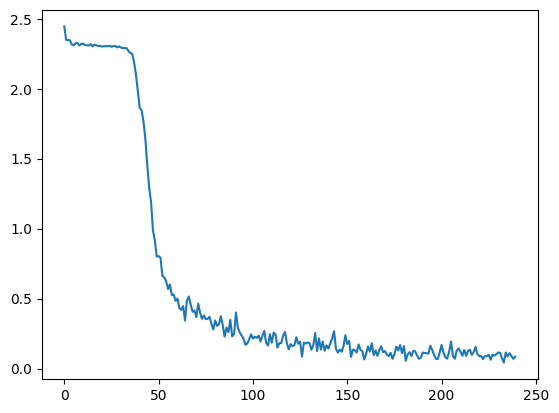

In [26]:
plt.plot(loss_hist)

In [27]:
import numpy as np

test_loss = []
net.eval()

for inputs, targets in test_dl:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
    
print(np.mean(test_loss))

0.07955022064270452


In [28]:
# Evaluate the model
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_dl:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 97.37%
